# Librerias

In [1]:
import os
import sys
import comtypes.client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# crear objeto API helper
helper = comtypes.client.CreateObject('ETABSv1.Helper')
helper = helper.QueryInterface(comtypes.gen.ETABSv1.cHelper)

myETABSObject = helper.CreateObjectProgID("CSI.ETABS.API.ETABSObject")     # Abrir una nueva ventana de Etabs
# myETABSObject = helper.GetObject("CSI.ETABS.API.ETABSObject")            # Trabajar con una ventana abierta de Etabs

myETABSObject.ApplicationStart()

# Crear un objeto SapModel
SapModel = myETABSObject.SapModel

# Iniciar Modelo
SapModel.InitializeNewModel()

# Crear un modelo en blanco
SapModel.File.NewBlank()

0

# Definicion de materiales

In [3]:
## Ejemplo
kgf_m_C = 8
SapModel.SetPresentUnits(kgf_m_C)

MATERIAL_CONCRETE = 2
SapModel.PropMaterial.SetMaterial('CONCRETO280', MATERIAL_CONCRETE)
E = 15000*(280**0.5)*10000   # (kgf/m2)
SapModel.PropMaterial.SetMPIsotropic('CONCRETO280', E, 0.2, 9.90E-06)
SapModel.PropMaterial.SetWeightAndMass('CONCRETO280', 1, 2400)
SapModel.PropMaterial.SetOConcrete('CONCRETO280', 2800000, False, 0, 1, 2, 0.0022, 0.0052)

MATERIAL_REBAR = 6
SapModel.PropMaterial.SetMaterial('REBAR', MATERIAL_REBAR)
SapModel.PropMaterial.SetMPIsotropic('REBAR', 2.0E10, 0.2, 9.90E-06)
SapModel.PropMaterial.SetWeightAndMass('REBAR', 1, 7850)
SapModel.PropMaterial.SetORebar("REBAR", 42000000, 63000000, 46000000, 69000000, 2, 2, 0.02, 0.1, False)

0

In [4]:
# Cambiar unidades a kgf_m_C 
kgf_m_C = 8
SapModel.SetPresentUnits(kgf_m_C)

# FrameObj Interface
# Definir las propiedades de Seccion a un Frame rectangular   
SapModel.PropFrame.SetRectangle('R1',               # Nombre del nuevo frame
                                'CONCRETO280',      # Nombre del Material, debe existir
                                0.6,                # peralte
                                0.3 )               # base
                                
# Datos extra para Frame Vigas        
SapModel.PropFrame.SetRebarBeam("R1",               # Nombre de un frame existente
                                "REBAR",            # Material del acero longitudinal
                                "REBAR",            # Material del acero transversal
                                0.06,               # Recubrimiento superior   6cm
                                0.06,               # Recubrimiento inferior   6cm
                                1.29*10**-4,        # Top Left Area
                                1.29*10**-4,        # Top Right Area
                                1.29*10**-4,        # Bottom Left Area
                                1.29*10**-4)        # Bottom Right Area

0

# Definir elementos 

## Slab

Slab Type 
- Slab       = 0
- Drop       = 1
- Ribbed     = 3
- Waffle     = 4
- Mat        = 5
- Footing    = 6

Shell Type
- ShellThin  = 1
- Shellthick = 2
- Menbrane   = 3
- Layered    = 6

In [5]:
# Definir las propiedades de la Losa Slab
SapModel.PropArea.SetSlab("Losa Macisa",          # Nombre de la Losa
                          0,                      # Slab Type - Slab
                          1,                      # ShellType, ShellThin
                          "CONCRETO280",          # Material
                          0.15)                     # Thickness  

0

In [6]:
# # Definir las propiedades de la Losa Slab
# SapModel.PropArea.SetSlab("Slab Ribbed",          # Nombre de la Losa
#                           3,                      # Slab Type - Ribbed
#                           3,                      # ShellType, ShellThin
#                           "CONCRETO280",          # Material
#                           0.15)                   # Thickness  

# # Definir las propiedades de la Losa Ribbed
# SapModel.PropArea.SetSlabRibbed("Slab Ribbed",   # Nombre de la Losa
#                                  11.1,           # OverallDepth              
#                                  22.2,           # SlabThickness
#                                  33.3,           # StemWidthTop
#                                  44.4,           # StemWidthBottom
#                                  55.5,           # RibSpacing
#                                  2)              # RibsParallelTo - Local Axis
                                 

In [7]:
# Ejemplo Extra
kgf_m_C = 8
SapModel.SetPresentUnits(kgf_m_C)

SapModel.PropArea.SetSlab("Slab Ribbed2", 3, 1, "CONCRETO280", 0.20)
SapModel.PropArea.SetSlabRibbed("Slab Ribbed2", 0.20, 0.05, 0.1, 0.1, 0.4, 1)

0

## Wall

WallPropType
- Specified      = 1
- AutoSelectList = 2

Shell Type
- ShellThin  = 1
- Shellthick = 2
- Menbrane   = 3
- Layered    = 6

In [8]:
SapModel.PropArea.SetWall("Placa",            # Name
                          1,                  # WallPropType , Seccion Especificada por el usuario
                          1,                  # Shell Type - Shell Thin   
                          "CONCRETO280",      # Nombre del Material
                          0.20)               # Thickness

0

Modificador de propiedades

* Value(0) Membrane f11 modifier
* Value(1) Membrane f22 modifier
* Value(2) Membrane f12 modifier
* Value(3) Bending m11 modifier
* Value(4) Bending m22 modifier
* Value(5) Bending m12 modifier
* Value(6) Shear v13 modifier
* Value(7) Shear v23 modifier
* Value(8) Mass modifier
* Value(9) Weight modifier

In [9]:
# MyValue = [1, 1, 1, 1, 1, 1, 1, 1, 1]
# SapModel.PropArea.SetModifiers("Placa", MyValue)

# Dibujar elemento Frame

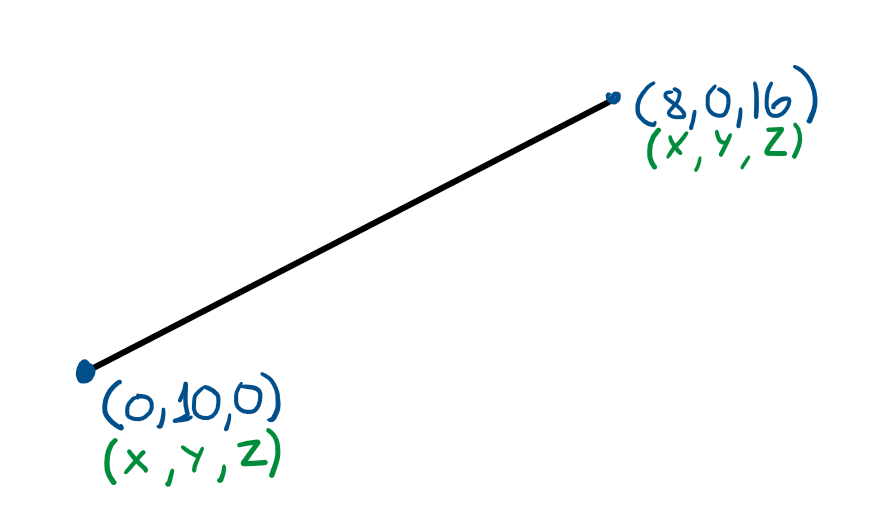

In [41]:
# # Añadir objeto Frame por Coordenadas
# FrameName1 = ' '
# [FrameName1, _] = SapModel.FrameObj.AddByCoord(0, 0, 0,      # Coordenadas X,Y,Z del punto inicial
#                                               0, 0, 10,      # Coordenadas X,Y,Z del punto final
#                                               FrameName1,    # Vacio, el programa asignará un nombre por defecto
#                                               'R1')          # Nombre de la seccion, debe existir el nombre de esa seccion, opcional

In [42]:
# FrameName2 = ' '
# FrameName3 = ' '
# [FrameName2, ret] = SapModel.FrameObj.AddByCoord(0, 0, 10, 8, 0, 16, FrameName2, 'R1')
# [FrameName3, ret] = SapModel.FrameObj.AddByCoord(-4, 0, 10, 0, 0, 10, FrameName3, 'R1')

## Dibujar elementos Area

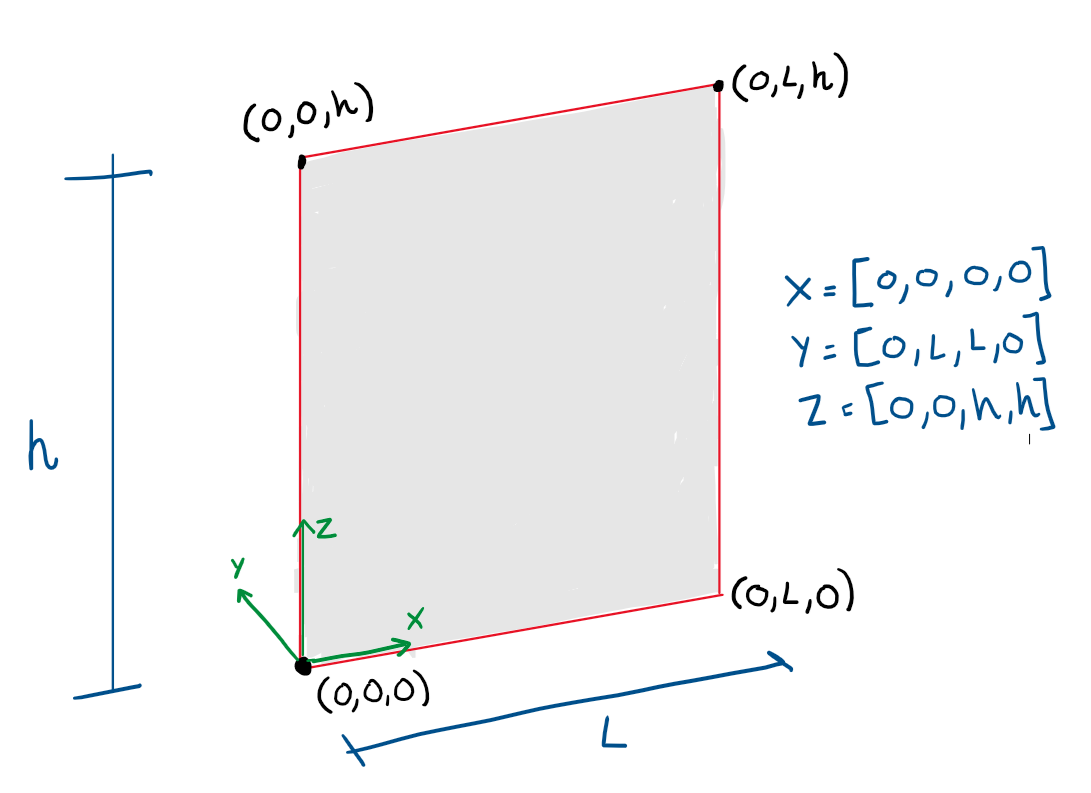

In [43]:
# AreaName = ' '
# x = [0,2,2,0]
# y = [0,0,0,0]
# z = [0,0,3,3]
# SapModel.AreaObj.AddByCoord(4, # Numero de puntos que definen el area
#                             x, # Coordenadas X
#                             y, # Coordenadas Y
#                             z, # Coordenadas Z
#                             AreaName, # Vacio, el programa asignará un nombre por defecto
#                             "Placa")  # Nombre de la seccion, debe existir el nombre de esa seccion, opcional

# SapModel.View.RefreshView(0,          # 0: Refresh todas las ventanas
#                         False)        # False: No matener el zoom

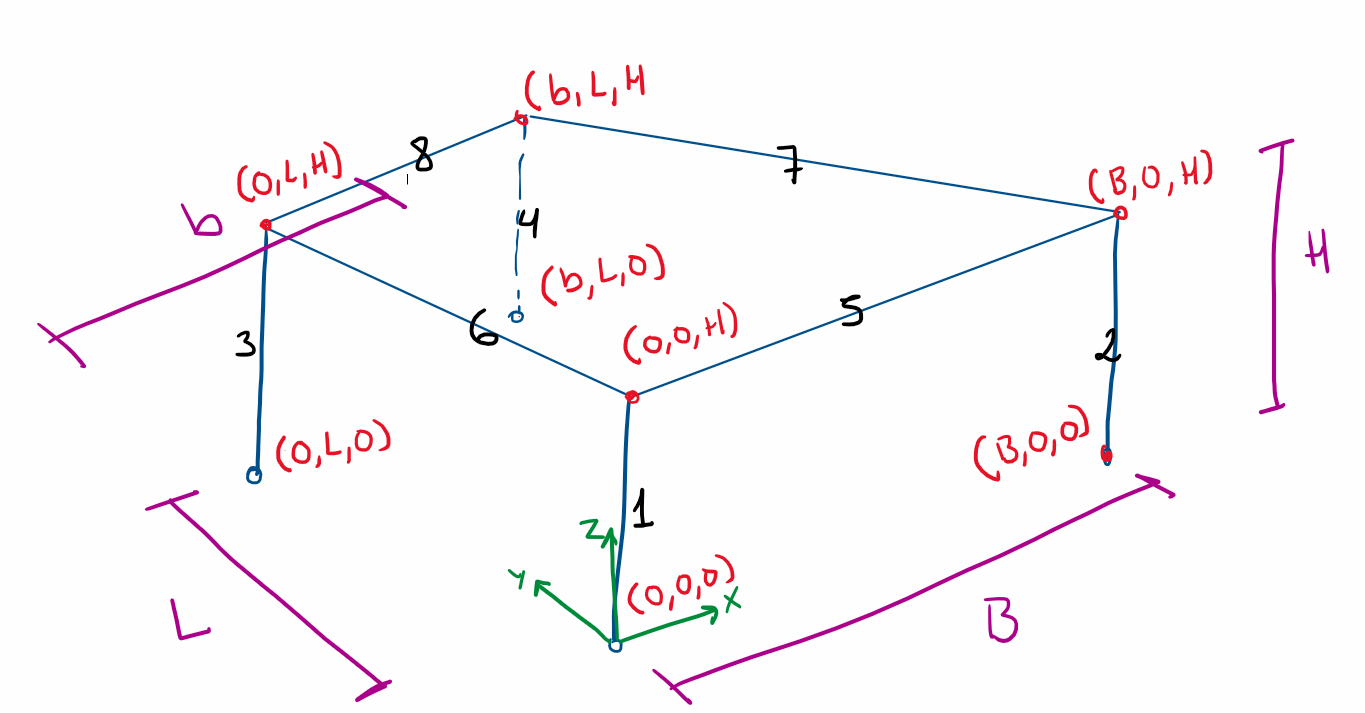

In [10]:
kgf_m_C = 8
SapModel.SetPresentUnits(kgf_m_C)

L = 7   # m
b = 7   # m
B = 7  # m
H = 2.7 # m

FrameName1 = ' '
FrameName2 = ' '
FrameName3 = ' '
FrameName4 = ' '
FrameName5 = ' '
FrameName6 = ' '
FrameName7 = ' '
FrameName8 = ' '
# Columnas
[FrameName1, ret] = SapModel.FrameObj.AddByCoord(0, 0, 0, 0, 0, H, FrameName1, 'R1')
[FrameName2, ret] = SapModel.FrameObj.AddByCoord(B, 0, 0, B, 0, H, FrameName2, 'R1')
[FrameName3, ret] = SapModel.FrameObj.AddByCoord(0, L, 0, 0, L, H, FrameName3, 'R1')
[FrameName4, ret] = SapModel.FrameObj.AddByCoord(b, L, 0, b, L, H, FrameName4, 'R1')
# Vigas
[FrameName5, ret] = SapModel.FrameObj.AddByCoord(0, 0, H, B, 0, H, FrameName5, 'R1')
[FrameName6, ret] = SapModel.FrameObj.AddByCoord(0, 0, H, 0, L, H, FrameName6, 'R1')
[FrameName7, ret] = SapModel.FrameObj.AddByCoord(B, 0, H, b, L, H, FrameName7, 'R1')
[FrameName8, ret] = SapModel.FrameObj.AddByCoord(0, L, H, b, L, H, FrameName8, 'R1')

AreaName = ' '
x = [0,B,b,0]
y = [0,0,L,L]
z = [H,H,H,H]
SapModel.AreaObj.AddByCoord(4, # Numero de puntos que definen el area
                            x, # Coordenadas X
                            y, # Coordenadas Y
                            z, # Coordenadas Z
                            AreaName, # Vacio, el programa asignará un nombre por defecto
                            "Losa Macisa")  # Nombre de la seccion, debe existir el nombre de esa seccion, opcional

SapModel.View.RefreshView(0,          # 0: Refresh todas las ventanas
                        False)        # False: No matener el zoom

0

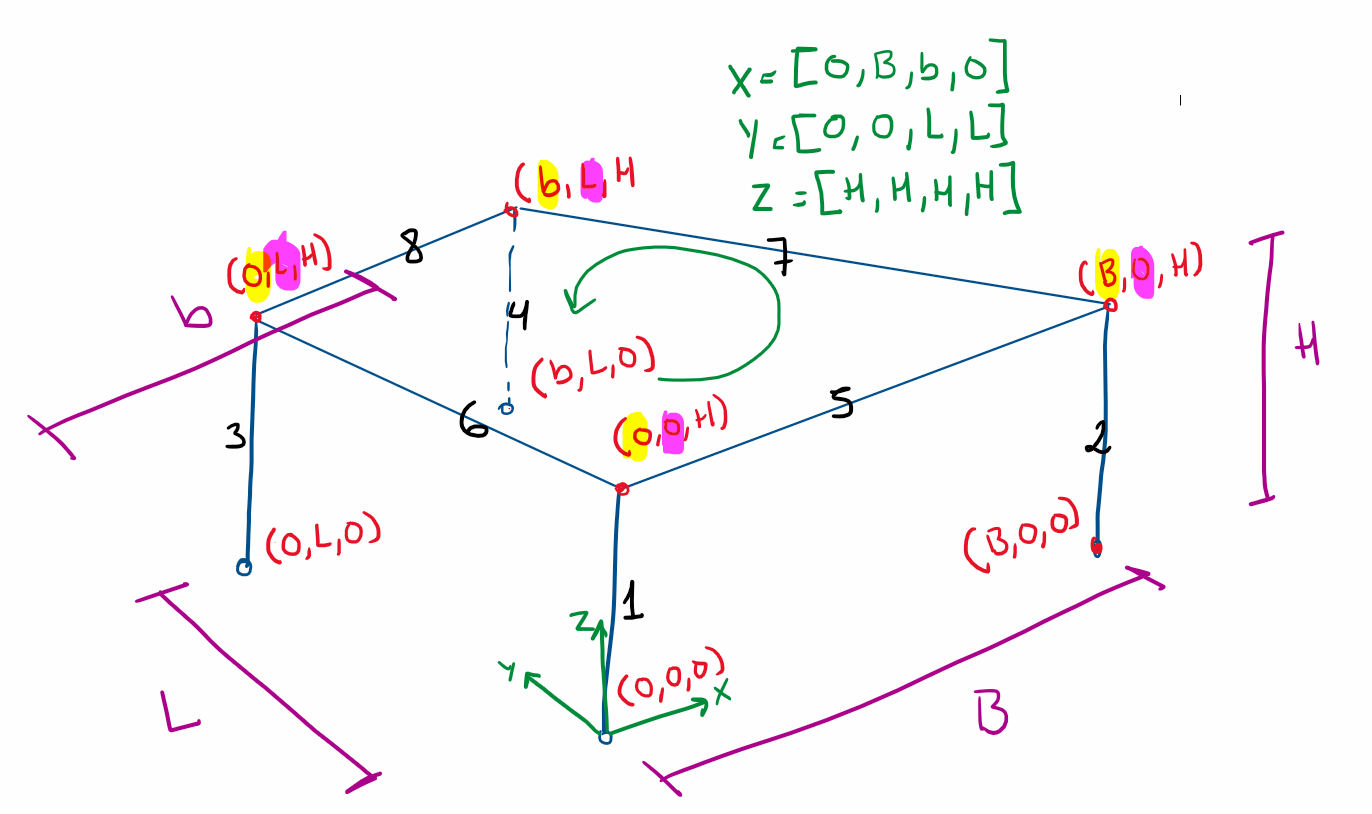